<h1 align=center >Feature Extraction</h1>

The `sklearn.feature_extraction` module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.

**Note:**

Feature extraction is very different from `Feature selection`: the former consists in transforming arbitrary data, such as `text` or `images`, into numerical features usable for machine learning. The latter is a machine learning technique applied on these features.

### Different TechTechniques for Feature Extraction
1. **Text:** The text submodule gathers utilities to build feature vectors from text documents.
    * CountVectorizer
    * TfidfVectorizer
    * TfidfTransformer 
    * HashingVectorizer 
    * DictVectorizer
2. **Image**
    * extract_patches_2d 
    * grid_to_graph 
    * PatchExtractor 
    * img_to_graph 
    * extract_patches 
    * reconstruct_from

### Text Extraction

1. **DictVectorizer**
The class `DictVectorizer` can be used to convert feature arrays represented as lists of standard Python dict objects to the NumPy/SciPy representation used by scikit-learn estimators.

While not particularly fast to process, Python’s dict has the advantages of being convenient to use, being sparse (absent features need not be stored) and storing feature names in addition to values.

DictVectorizer implements what is called `one-of-K or “one-hot”` coding for categorical (aka nominal, discrete) features. Categorical features are `“attribute-value”` pairs where the value is restricted to a list of discrete of possibilities without ordering (e.g. topic identifiers, types of objects, tags, names…).

In the following, “city” is a categorical attribute while “temperature” is a traditional numerical feature:

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
    {'city': 'India', 'temperature': 28.}
]
measurements

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0},
 {'city': 'India', 'temperature': 28.0}]

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
vec

DictVectorizer()

In [4]:
vec.fit_transform(measurements).toarray()

array([[ 1.,  0.,  0.,  0., 33.],
       [ 0.,  0.,  1.,  0., 12.],
       [ 0.,  0.,  0.,  1., 18.],
       [ 0.,  1.,  0.,  0., 28.]])

In [5]:
vec.get_feature_names()

['city=Dubai',
 'city=India',
 'city=London',
 'city=San Francisco',
 'temperature']

In [6]:
vec.feature_names_

['city=Dubai',
 'city=India',
 'city=London',
 'city=San Francisco',
 'temperature']

In [7]:
vec.vocabulary_

{'city=Dubai': 0,
 'temperature': 4,
 'city=London': 2,
 'city=San Francisco': 3,
 'city=India': 1}

In [11]:
#part of of Speach
pos_windows = [
    {
        'word-2':'the',
        'pos-2':'DT',
        'world -1':'Cat',
        'pos-1':'NN',
        'word+1':'on',
        'pos+1':'pp',
        'ÿ':'pp',
        "Pop":"Reddy"
        
    }
              ]

In [8]:
ord('P'),ord('p')

(80, 112)

In [9]:
vec = DictVectorizer()
vec

DictVectorizer()

In [12]:
pos_vectorization  = vec.fit_transform(pos_windows)
pos_vectorization.toarray()

array([[1., 1., 1., 1., 1., 1., 1., 1.]])

In [13]:
vec.get_feature_names()

['Pop=Reddy',
 'pos+1=pp',
 'pos-1=NN',
 'pos-2=DT',
 'word+1=on',
 'word-2=the',
 'world -1=Cat',
 'ÿ=pp']

In [14]:
vec.vocabulary_

{'word-2=the': 5,
 'pos-2=DT': 3,
 'world -1=Cat': 6,
 'pos-1=NN': 2,
 'word+1=on': 4,
 'pos+1=pp': 1,
 'ÿ=pp': 7,
 'Pop=Reddy': 0}

In [15]:
ord('-')

45

In [16]:
ord('+')

43

In [17]:
chr(43)

'+'

### CountVectorizer

Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using scipy.sparse.coo_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

![](https://lh3.googleusercontent.com/-v7Z2-GpVjz8/XuGU9z2iiiI/AAAAAAAAomE/oZnEq3Qicdk_vLM1aXiL5oyRnzhLmSB5wCK8BGAsYHg/s0/2020-06-10.png)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog,the"]

In [24]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

CountVectorizer()

In [25]:
# summarize
print(vectorizer.vocabulary_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


In [26]:
# encode document
vector = vectorizer.transform(text)

In [27]:
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 3]]


In [28]:
# encode another document
text2 = ["the puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 0 0 0 0 0 0 1]]


#### Example-2


In [30]:
sample_text = ["One of the most basic ways we can numerically represent words "
               "is through the one-hot encoding method (also sometimes called "
               "count vectorizing)."]

In [31]:
vectorizer.fit(sample_text)

CountVectorizer()

In [32]:
print('Vocabulary: ')
print(vectorizer.vocabulary_)

Vocabulary: 
{'one': 12, 'of': 11, 'the': 15, 'most': 9, 'basic': 1, 'ways': 18, 'we': 19, 'can': 3, 'numerically': 10, 'represent': 13, 'words': 20, 'is': 7, 'through': 16, 'hot': 6, 'encoding': 5, 'method': 8, 'also': 0, 'sometimes': 14, 'called': 2, 'count': 4, 'vectorizing': 17}


In [33]:
vector = vectorizer.transform(sample_text)

In [34]:
# Our final vector:
print('Full vector: ')
print(vector.toarray())

Full vector: 
[[1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1]]


In [35]:
# Or if we wanted to get the vector for one word:
print('Hot vector: ')
print(vectorizer.transform(['hot']).toarray())

Hot vector: 
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [36]:
# Or if we wanted to get multiple vectors at once to build matrices
print('Hot and one: ')
print(vectorizer.transform(['hot', 'one']).toarray())

Hot and one: 
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]


In [37]:
# We could also do the whole thing at once with the fit_transform method:
print('One swoop:')
new_text = ['Today is the day that I do the thing today, today']
new_vectorizer = CountVectorizer()
print(new_vectorizer.fit_transform(new_text).toarray())

One swoop:
[[1 1 1 1 2 1 3]]


#### Feature hashing
The class FeatureHasher is a high-speed, low-memory vectorizer that uses a technique known as feature hashing, or the “hashing trick”. Instead of building a hash table of the features encountered in training, as the vectorizers do, instances of FeatureHasher apply a hash function to the features to determine their column index in sample matrices directly. The result is increased speed and reduced memory usage, at the expense of inspectability; the hasher does not remember what the input features looked like and has no inverse_transform method.

![](https://lh3.googleusercontent.com/-dULxt0dtIQY/XuGc3TOy1vI/AAAAAAAAomQ/EqrbctojhsM7dNDuDuLOpcOHP5ORwXv2QCK8BGAsYHg/s0/2020-06-10.png)

* John likes to watch movies.
* Mary likes movies too.
* John also likes football.

|Term|Index|
|----|---|
|John|1|
|likes|2|
|to|3|
|watch|4|
|movies|5|
|Mary|6|
|too|7|
|also|8|
|football|9|

![](https://lh3.googleusercontent.com/-7EK06T5PlZM/XuGd82LfcgI/AAAAAAAAomY/dueH8562uYMqTLlPQ7B1piZaQg0Wu3_KgCK8BGAsYHg/s0/2020-06-10.png)

In [38]:
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]

In [39]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=4)

In [40]:
f = h.transform(D)

In [41]:
f.toarray()

array([[ 0., -1., -4.,  2.],
       [-5., -2.,  0.,  0.]])

#### Example-2

In [52]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [53]:
data = pd.DataFrame(data)

In [55]:
def has_col(df ,col,vocab):
    cols = [col + "=" + str(v) for v in vocab]
    def xform(x): 
        temp = [0 for i in range(len(vocab))];
        temp[vocab.index(x)]=1;
        return pd.Series(temp,index=cols)
    df[cols] =df[col].apply(xform)
    return df.drop(col,axis=1)   

In [56]:
has_col(data,'state',['Ohio', 'Nevada'])

,year,pop,state=Ohio,state=Nevada
0,2000,1.5,1,0
1,2001,1.7,1,0
2,2002,3.6,1,0
3,2001,2.4,0,1
4,2002,2.9,0,1


### Text Features

Another common need in feature engineering is to convert text to a set of representative numerical values. For example, most automatic mining of social media data relies on some form of encoding the text as numbers. One of the simplest methods of encoding data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

For example, consider the following set of three phrases:

In [58]:
sample = pd.Series(['problem of evil problem',
          'evil queen',
          'horizone problem'])
sample

0    problem of evil problem
1                 evil queen
2           horizone problem
dtype: object

For a vectorization of this data based on word count, we could construct a column representing the word "problem," the word "evil," the word "horizon," and so on. While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's `CountVectorizer`:


|Words|count|
|-----|------|
|problem|3|
|of |1|
|evil|2|
|queen|1|
|horizone|1|

In [59]:
sample.str.lower()

0    problem of evil problem
1                 evil queen
2           horizone problem
dtype: object

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [62]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizone,of,problem,queen
0,1,0,1,2,0
1,1,0,0,0,1
2,0,1,0,1,0


There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms.

## Term frequency

Suppose we have a set of English text documents and wish to rank which document is most relevant to the query, "the brown cow". A simple way to start out is by eliminating documents that do not contain all three words "the", "brown", and "cow", but this still leaves many documents.

To further distinguish them, we might count the number of times each term occurs in each document; the number of times a term occurs in a document is called its term frequency.


$\text{tf-idf(t,d)}=\text{tf(t,d)} \times \text{idf(t)}$



tf–idf means term-frequency times **inverse document-frequency**

$\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1$

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

In [64]:
Tan = TfidfVectorizer()

In [65]:
o = Tan.fit_transform(sample)
o

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [66]:
o.toarray()

array([[0.38550292, 0.        , 0.50689001, 0.77100584, 0.        ],
       [0.60534851, 0.        , 0.        , 0.        , 0.79596054],
       [0.        , 0.79596054, 0.        , 0.60534851, 0.        ]])

In [67]:
pd.DataFrame(o.toarray(), columns=['evil','horizone','of','problem','queen'])

,evil,horizone,of,problem,queen
0,0.385503,0.000000,0.50689,0.771006,0.000000
1,0.605349,0.000000,0.00000,0.000000,0.795961
2,0.000000,0.795961,0.00000,0.605349,0.000000


In [68]:
tt = TfidfTransformer(smooth_idf=False)

In [69]:
tt.fit_transform(o)

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

## Image Feature Extraction

In [70]:
from sklearn.feature_extraction import image

In [71]:
array = np.arange(4*4*3).reshape((4,4,3))
array

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]]])

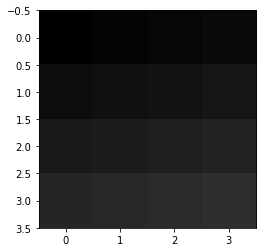

In [74]:
plt.imshow(array)

In [75]:
array[:,:,0]

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33],
       [36, 39, 42, 45]])

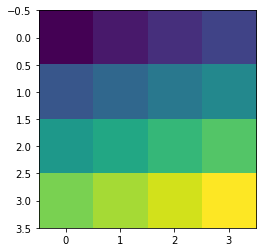

In [76]:
plt.imshow(array[:,:,0])

In [77]:
array.shape

(4, 4, 3)

In [78]:
patches = image.extract_patches_2d(array,(2,2),max_patches=2,random_state=0)
patches

array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[12, 13, 14],
         [15, 16, 17]]],


       [[[15, 16, 17],
         [18, 19, 20]],

        [[27, 28, 29],
         [30, 31, 32]]]])

In [79]:
patches.shape

(2, 2, 2, 3)

In [80]:
patches[:,:,:,0]

array([[[ 0,  3],
        [12, 15]],

       [[15, 18],
        [27, 30]]])

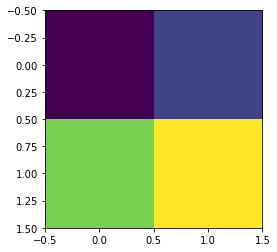

In [81]:
plt.imshow(patches[:,:,:,0][0])

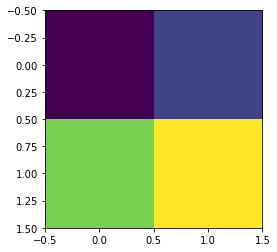

In [82]:
plt.imshow(patches[:,:,:,0][1])

In [85]:
reconstruct  = image.reconstruct_from_patches_2d(patches,(4,4,3)) 
reconstruct.shape

(4, 4, 3)

In [87]:
p = image.PatchExtractor(patch_size=(2,2)).transform(patches)

In [88]:
p.shape

(2, 2, 2, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


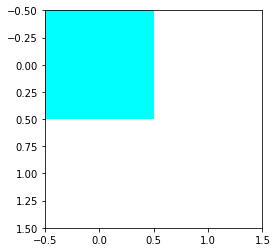

In [89]:
plt.imshow(p[0])

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [95]:
path = "https://raw.githubusercontent.com/reddyprasade/Bird-Classifications-Problem/master/Parrot/1.jpg"

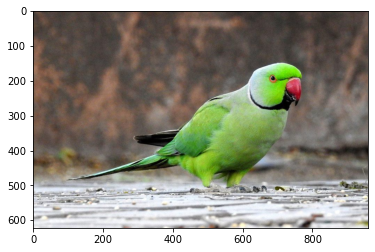

In [97]:
image = imread(path)
plt.imshow(image)

In [103]:
image.shape

(622, 960, 3)

In [100]:
print(image)

[[[ 77  68  69]
  [ 76  68  66]
  [ 78  66  66]
  ...
  [ 87  69  65]
  [ 91  73  69]
  [ 99  81  77]]

 [[ 71  62  63]
  [ 72  64  62]
  [ 73  63  62]
  ...
  [ 90  72  68]
  [ 92  74  70]
  [ 98  80  76]]

 [[ 67  61  61]
  [ 69  61  59]
  [ 71  61  60]
  ...
  [ 93  75  71]
  [ 92  74  70]
  [ 94  76  72]]

 ...

 [[222 221 226]
  [226 225 230]
  [227 226 231]
  ...
  [216 218 207]
  [217 219 208]
  [217 219 208]]

 [[223 222 227]
  [226 225 230]
  [228 227 232]
  ...
  [216 219 212]
  [219 222 215]
  [222 225 218]]

 [[224 223 228]
  [227 226 231]
  [228 227 232]
  ...
  [222 224 219]
  [222 224 219]
  [223 225 220]]]


In [113]:
features = np.reshape(image,(622*960,3))
features.shape

(597120, 3)

In [114]:
features

array([[ 77,  68,  69],
       [ 76,  68,  66],
       [ 78,  66,  66],
       ...,
       [222, 224, 219],
       [222, 224, 219],
       [223, 225, 220]], dtype=uint8)

In [116]:
from skimage.filters import prewitt_h,prewitt_v

In [118]:
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(features)

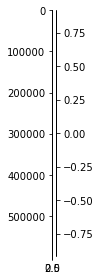

In [119]:
imshow(edges_prewitt_horizontal, cmap='gray')

In [122]:
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(features)

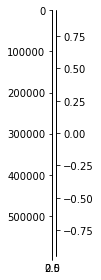

In [123]:
imshow(edges_prewitt_vertical, cmap='gray')